# ラプラシアンフィルタ

In [1]:
import numpy as np
#データの読み込みと前処理
from keras.utils import np_utils
from keras.datasets import mnist
#kerasでCNN構築
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
#時間計測
import time
import cv2
 
'''
データの読み込みと前処理
'''
#データの読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#訓練用
#X

#ラプラシアンフィルタ
X_train = cv2.Laplacian(X_train, cv2.CV_32F, ksize=3)

X_train = X_train.reshape(60000, 28, 28, 1)
X_train = X_train.astype('float32')#型を変更
X_train /= X_train.max() #0から1.0の範囲に変換

#y
#正解ラベル
correct = 10
y_train = np_utils.to_categorical(y_train, correct)



#テストデータ
#X
#ラプラシアンフィルタ
X_test = cv2.Laplacian(X_test, cv2.CV_32F, ksize=3)

X_test = X_test.reshape(10000, 28, 28, 1)
X_test = X_test.astype('float32')
X_test /= X_test.max()

#y
y_test = np_utils.to_categorical(y_test, correct)



C:\Users\ail\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
 
'''
CNNの構築
'''
 
model = Sequential()
 
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(10, activation='softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
 
'''
学習
'''
#計測開始
startTime = time.time()
 
history = model.fit(X_train, y_train, epochs=20, batch_size=100, verbose=1, validation_data=(X_test, y_test))
 
score = model.evaluate(X_test, y_test, verbose=0)
timer = time.time() - startTime
print('Test Loss:{}'.format(score[0]))
print('Test accuracy:{}'.format(score[1]))
#処理時間
print("time:{}sec".format(timer))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 35s 589us/step - loss: 0.4087 - acc: 0.8833 - val_loss: 0.1842 - val_acc: 0.9492
Epoch 2/20
60000/60000 [==============================] - 34s 564us/step - loss: 0.1622 - acc: 0.9521 - val_loss: 0.1352 - val_acc: 0.9609
Epoch 3/20
60000/60000 [==============================] - 34s 565us/step - loss: 0.1225 - acc: 0.9629 - val_loss: 0.1190 - val_acc: 0.9644
Epoch 4/20
60000/60000 [==============================] - 35s 586us/step - loss: 0.1040 - acc: 0.9680 - val_loss: 0.1046 - val_acc: 0.9678
Epoch 5/20
60000/60000 [==============================] - 35s 579us/step - loss: 0.0908 - acc: 0.9720 - val_loss: 0.0986 - val_acc: 0.9692
Epoch 6/20
60000/60000 [==============================] - 35s 577us/step - loss: 0.0810 - acc: 0.9752 - val_loss: 0.0951 - val_acc: 0.9687
Epoch 7/20
60000/60000 [==============================] - 35s 578us/step - loss: 0.0727 - acc: 0.9781 - val_loss: 0.

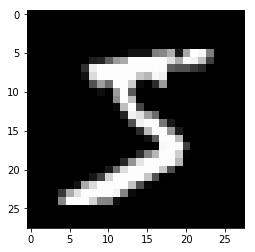

255
2040.0


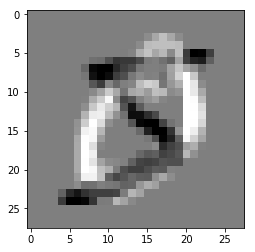

1.0


5

In [5]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
#データの読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

mn=0

plt.imshow(X_train[mn])
plt.gray()
plt.show()
#ガウスフィルタ
print(X_train.max())
X_train = cv2.Laplacian(X_train, cv2.CV_32F, ksize=3)
print(X_train.max())

plt.imshow(X_train[mn])
plt.gray()
plt.show()
cv2.imwrite('Laplacian.png', X_train[mn])
#訓練データ
X_train = X_train.reshape(60000, 28, 28, 1)

X_train = X_train.astype('float32')#型を変更
X_train /= X_train.max() #0から1.0の範囲に変換
print(X_train.max())
y_train[mn]